In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots


In [2]:
dbFile = 'sims_featureScheduler_runs1.6/potential_schedulers/baseline_nexp1_v1.6_10yrs.db'
conn = db.OpsimDatabase(dbFile)

runName = 'baseline_nexp1_v1.6'
outDir = 'night_plots'
resultsDb = db.ResultsDb(outDir=outDir)


In [3]:
sqls = ['note like "blob%"', 'note like "DD%"', 'note like "greedy%"']
night = 810
sqls = [sql+' and night=%i' % night for sql in sqls]
bundleList = []
nside=64
for sql in sqls:
    metric = metrics.CountMetric('filter', metricName='Count')
    slicer = slicers.HealpixSlicer()
    summaryStats = []
    plotDict = {'xlabel': 'N observation'}
    plotFunc = plots.HealpixSkyMap()
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql,
                                                 plotDict=plotDict,
                                                 summaryMetrics=summaryStats,
                                                 runName=runName,plotFuncs=[plotFunc]))
    
    slicer = slicers.HealpixSlicer(nside=nside, latCol='altitude', lonCol='azimuth',
                                   latLonDeg=True, useCache=False)
    metric = metrics.CountMetric('filter', metricName='altAz Count')
    plotDict = {'xlabel': 'N observation'}
    plotFunc = plots.LambertSkyMap()
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql,
                                                 plotDict=plotDict,
                                                 summaryMetrics=summaryStats,
                                                 runName=runName,plotFuncs=[plotFunc]))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database SummaryAllProps with constraint note like "DD%" and night=810 for columns ['azimuth', 'fieldRA', 'fieldDec', 'altitude', 'filter']
Found 96 visits
Running:  ['baseline_nexp1_v1_6_Count_note_like_DD_and_night810_HEAL']
Completed metric generation.
Running:  ['baseline_nexp1_v1_6_altAz_Count_note_like_DD_and_night810_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint note like "greedy%" and night=810 for columns ['azimuth', 'fieldRA', 'fieldDec', 'altitude', 'filter']
Found 144 visits
Running:  ['baseline_nexp1_v1_6_Count_note_like_greedy_and_night810_HEAL']
Completed metric generation.
Running:  ['baseline_nexp1_v1_6_altAz_Count_note_like_greedy_and_night810_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint note like "blob%" and night=810 for columns ['azimuth', 'fieldRA', 'f

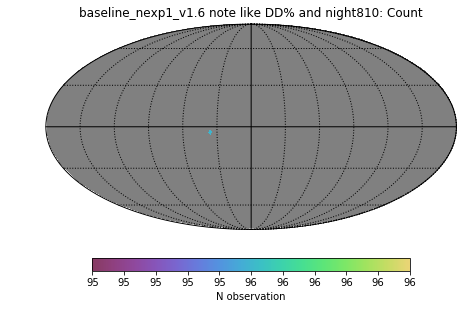

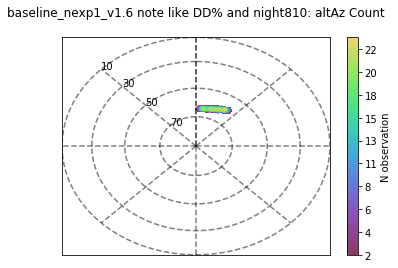

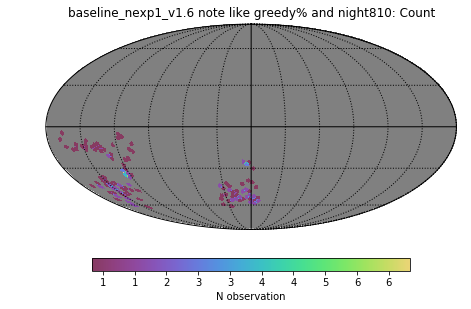

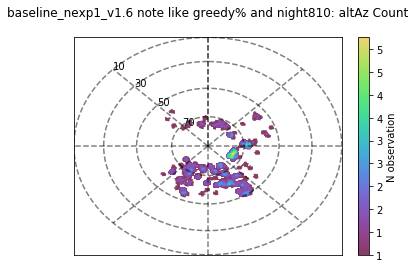

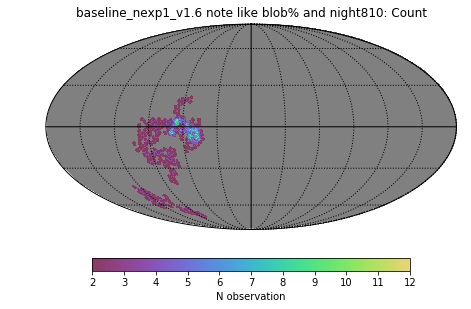

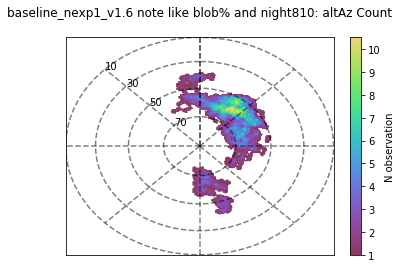

In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)